<b><font size = 2><span style="color:#2a6592">Transformer models comparison for disaster tweets 🌊 </span></font></b>  

<b><font size = 2><span style="color:#2a6592">Created By Burhanuddin Latsaheb </span></font> </b> 


<center><font size = 6><span style="color:#2F4F4F"> Transformer models comparison for disaster tweets 🌊 </span></font></center>  

## <center><font size =4><span style="color:#2F4F4F"> If you find this notebook useful,support with an upvote👍👍 </span></font></center>


 <b><center><font size = 6><span style="color:#2a6592"> Introduction </span></font></center></b>
<font size = 5><span style="color:#db9833">Notebook Overview : </span></font>

* <font size = 3><span style="color:#2F4F4F"> This notebook contains training , evaluation and comparision of 5 transformer models on Disaster Tweets Dataset . </span></font>
*  <font size = 3><span style="color:#2F4F4F">5 of the pretrained transformer models and their respective tokenizers are taken from [huggingface.co](https://huggingface.co)</span></font>
*  <font size = 3><span style="color:#2F4F4F">The models are trained using the `Tensorflow` Library</span></font>


<a id = "toc"></a>
<font size = 5><span style="color:#db9833">Table of Contents : </span></font>

- [1. Imports](#imports)
- [2. Helper Functions](#helper_functions)
- [3. Hyperparameters](#hyperparameters)
- [4. EDA](#EDA)
  * [4.1 Random examples](#Random_Examples)
  * [4.2 Common Words](#Common_Words)
- [5. Dataset](#dataset)
- [6. Models](#Models)
  * [6.1 Bert Base Uncased](#bert_base_uncased)
    + [6.1.1 Tokenization](#bert_base_uncased_tokenization)
    + [6.1.2 Model Loading](#bert_base_uncased_model_loading)
    + [6.1.3 Model Building](#bert_base_uncased_model)
    + [6.1.4 Callback](#bert_base_uncased_callback)
    + [6.1.5 Compile](#bert_base_uncased_compile)
    + [6.1.6 Training](#bert_base_uncased_training)
    + [6.1.7 Graphs](#bert_base_uncased_graph)
    + [6.1.8 Confusion Matrix](#bert_base_uncased_confusion_matrix)
    + [6.1.9 Predictions](#bert_base_uncased_predictions)
  * [6.2 Bert Large](#bert_large)
    + [6.2.1 Tokenization](#bert_large_tokenization)
    + [6.2.2 Model Loading](#bert_large_model_loading)
    + [6.2.3 Model Building](#bert_large_model)
    + [6.2.4 Callback](#bert_large_callback)
    + [6.2.5 Compile](#bert_large_compile)
    + [6.2.6 Training](#bert_large_training)
    + [6.2.7 Graphs](#bert_large_graph)
    + [6.2.8 Confusion Matrix](#bert_large_confusion_matrix)
    + [6.2.9 Predictions](#bert_large_predictions)
 * [6.3 Distill Bert](#distill_bert)
    + [6.3.1 Tokenization](#distill_bert_tokenization)
    + [6.3.2 Model Loading](#distill_bert_model_loading)
    + [6.3.3 Model Building](#distill_bert_model)
    + [6.3.4 Callback](#distill_bert_callback)
    + [6.3.5 Compile](#distill_bert_compile)
    + [6.3.6 Training](#distill_bert_training)
    + [6.3.7 Graphs](#distill_bert_graph)
    + [6.3.8 Confusion Matrix](#distill_bert_confusion_matrix)
    + [6.3.9 Predictions](#dsitill_bert_predictions)
  * [6.4 Roberta](#roberta_base)
    + [6.4.1 Tokenization](#roberta_tokenization)
    + [6.4.2 Model Loading](#roberta_model_loading)
    + [6.4.3 Model Building](#roberta_model)
    + [6.4.4 Callback](#roberta_callback)
    + [6.4.5 Compile](#roberta_compile)
    + [6.4.6 Training](#roberta_training)
    + [6.4.7 Graphs](#roberta_graph)
    + [6.4.8 Confusion Matrix](#roberta_confusion_matrix)
    + [6.4.9 Predictions](#roberta_predictions)
  * [6.5 Roberta Large](#roberta_large)
    + [6.5.1 Tokenization](#roberta_large_tokenization)
    + [6.5.2 Model Loading](#roberta_large_loading)
    + [6.5.3 Model Building](#roberta_large_model)
    + [6.5.4 Callback](#roberta_large_callback)
    + [6.5.5 Compile](#roberta_large_compile)
    + [6.5.6 Training](#roberta_large_training)
    + [6.5.7 Graphs](#roberta_large_graph)
    + [6.5.8 Confusion Matrix](#roberta_large_confusion_matrix)
    + [6.5.9 Predictions](#roberta_large_predictions)
 * [6.6 XLM Roberta](#xlm_roberta)
- [7. Comparision](#Comaprision)

<a id = "imports"></a>
 **<center><font size = 6><span style="color:#2a6592">1. Imports </span></font></center>**

In [1]:
import os
import re
import nltk
import keras.backend as K
import random
import string
import numpy as np 
import pandas as pd 
import tensorflow as tf
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud, ImageColorGenerator ,STOPWORDS
from transformers import AutoTokenizer , TFAutoModel
from sklearn.metrics import confusion_matrix , classification_report
os.environ["WANDB_DISABLED"] = "true"

import warnings
warnings.filterwarnings('ignore')

<a id = "helper_functions"></a>
 **<center><font size = 6><span style="color:#2a6592">2. Helper Functions </span></font></center>**

In [2]:
def clean_dataset(text):
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', '',text) #Removes Websites
    text  = re.sub(r'<.*?>' ,'', text) 
    text = re.sub(r'\x89\S+' , ' ', text) #Removes string starting from \x89
    text = re.sub('\w*\d\w*', '', text)  # Removes numbers
    text = re.sub(r'[^\w\s]','',text)   # Removes Punctuations
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    return text

def Convert(string):
    li = list(string.lower().split(" "))
    return li
    

<a id = "hyperparameters"></a>
 **<center><font size = 6><span style="color:#2a6592">3. Hyperparameters  </span></font></center>**

In [3]:
class config:
    PATH = "../input/nlp-getting-started/"
    TRAIN_PATH = "../input/nlp-getting-started/train.csv"
    TEST_PATH = "../input/nlp-getting-started/test.csv"
    MAX_LEN = 36
    LOWER_CASE = True
    RANDOM_STATE = 12
    TEST_SIZE = 0.2
    NUM_LABELS = 1
    BATCH_SIZE = 128
    LEARNING_RATE = 5e-5
    EPOCHS = 10
    WEIGTH_DECAY = 0.01
    DEVICE = "cuda"

<a id = "EDA"></a>
 **<center><font size = 6><span style="color:#2a6592">4. EDA </span></font></center>**

In [4]:
train_df = pd.read_csv(config.TRAIN_PATH)
test_df = pd.read_csv(config.TEST_PATH)

In [5]:
train_df.head(4)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1


<a id = "Random_Examples"></a>
<font size = 5><span style="color:#db9833">4.1. Random examples :</span></font>

In [6]:
random_index = random.randint(0,len(train_df)-5)
for row in train_df[["text","target"]][random_index:random_index +5].itertuples():
  _,text,target = row
  print(f"Target :{target}" , "(real disaster)" if target > 0 else "(not a real disaster)")
  print(f"Text :\n{text}\n")
  s = clean_dataset(text)
  print(f"Cleaned Text: \n{s}\n")
  print("-------------------------------------------------------\n")

Target :0 (not a real disaster)
Text :
@Jude_Mugabi not that all abortions get you traumatised. At times you are okay with the decision due to reasons like rape

Cleaned Text: 
jude_mugabi not that all abortions get you traumatised at times you are okay with the decision due to reasons like rape

-------------------------------------------------------

Target :0 (not a real disaster)
Text :
ÛÏ@_keits: @LIVA_GOTTA get a gold chain you'll understandÛ

One boy gave me one and my neck went green It traumatised me

Cleaned Text: 
  liva_gotta get a gold chain youll understand 

one boy gave me one and my neck went green it traumatised me

-------------------------------------------------------

Target :0 (not a real disaster)
Text :
@CiaraMcKendry mine came on the day after my data renewed this month i was traumatised

Cleaned Text: 
ciaramckendry mine came on the day after my data renewed this month i was traumatised

-------------------------------------------------------

Target :0 (n

In [7]:
train_df["text"] = train_df["text"].map(clean_dataset)
train_df["List of Words"] = train_df["text"].map(Convert)
test_df["text"] = test_df["text"].map(clean_dataset)
test_df["List of Words"] = test_df["text"].map(Convert)

<a id = "Common_Words"></a>
<font size = 5><span style="color:#db9833">4.2. Common Words :</span></font>

In [8]:
stop_words = nltk.corpus.stopwords.words("english")
disaster_tweets = train_df[train_df["target"]==1]["text"].tolist()
non_disaster_tweets = train_df[train_df["target"]==0]["text"].to_list()

In [9]:
disaster_tweets_df = pd.DataFrame(disaster_tweets , columns = ["text"])
disaster_tweets_df["List of Words"] = disaster_tweets_df["text"].map(Convert)

non_disaster_tweets_df = pd.DataFrame(non_disaster_tweets , columns = ["text"])
non_disaster_tweets_df["List of Words"] = non_disaster_tweets_df["text"].map(Convert)

In [10]:
disaster_words = disaster_tweets_df["List of Words"]
disaster_allwords = []
for wordlist in disaster_words:
    for disaster_word in wordlist:
        if disaster_word not in stop_words:
            disaster_allwords.append(disaster_word)


non_disaster_words = non_disaster_tweets_df["List of Words"]
non_disaster_allwords = []
for wordlist in non_disaster_words:
    for non_disaster_word in wordlist:
        if non_disaster_word not in stop_words:
            non_disaster_allwords.append(non_disaster_word)

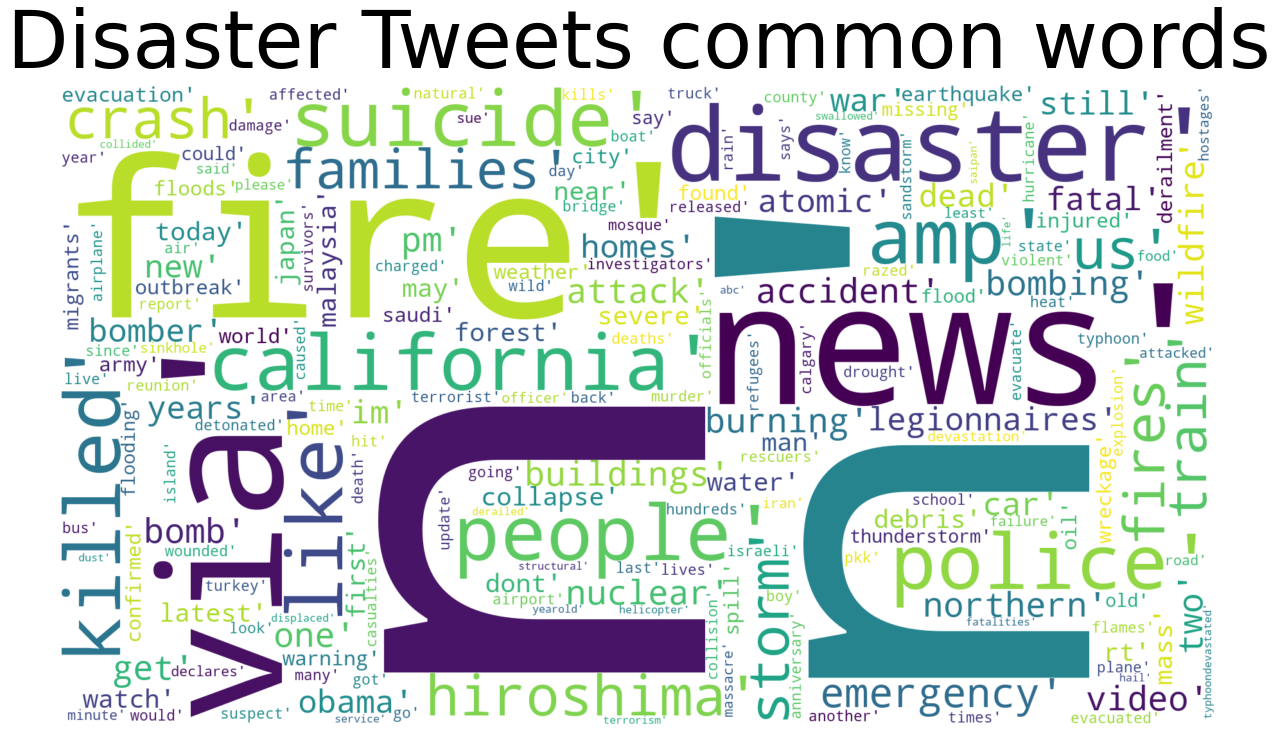

In [11]:
mostcommon = FreqDist(disaster_allwords).most_common(2000)
wordcloud = WordCloud(width=1800, height=1000, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Disaster Tweets common words', fontsize=80)
plt.tight_layout(pad=0)
plt.show()

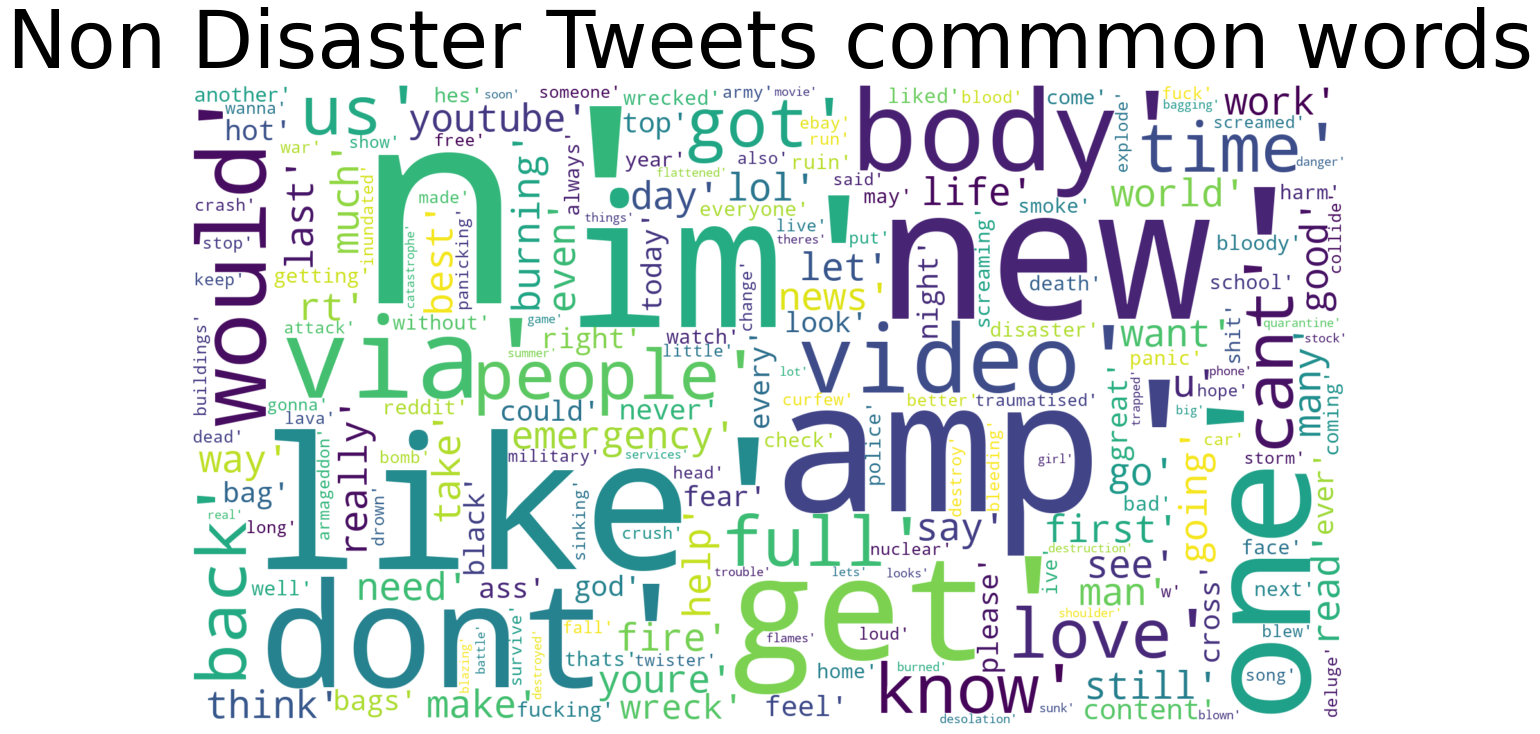

In [12]:
mostcommon = FreqDist(non_disaster_allwords).most_common(2000)
wordcloud = WordCloud(width=1800, height=1000, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Non Disaster Tweets commmon words', fontsize=80)
plt.tight_layout(pad=0)
plt.show()

<a id = "dataset"></a>
# <b><center><font size = 6><span style="color:#2a6592">5. Dataset </span></font></center></b>

In [13]:
test_ids = test_df["id"]
train_df = train_df.drop(["id" , "keyword" , "location" , "List of Words"] , axis = 1)
test_df = test_df.drop(["id" , "keyword" , "location" , "List of Words"], axis =1 )

<a id = "Models"></a>
**<center><font size = 6><span style="color:#2a6592">6. Models </span></font></center>**

## <font size = 3><span style="color:#2F4F4F">We are going to train 5 transformer models in this section : </span></font>
*  <font size = 3><span style="color:#2F4F4F">1. Bert Base Uncased</span></font>
*  <font size = 3><span style="color:#2F4F4F">2. Bert Large </span></font>
*  <font size = 3><span style="color:#2F4F4F">3. Distill Bert </span></font>
*  <font size = 3><span style="color:#2F4F4F">4. Roberta </span></font>
*  <font size = 3><span style="color:#2F4F4F">5. Roberta Large </span></font>


<a id = "bert_base_uncased"></a>
**<center><font size = 5><span style="color:#db9833">6.1 Bert Base Uncased </span></font></center>**
* <font size = 3><span style="color:#2F4F4F">The model weights can be found at [Bert Base uncased](https://huggingface.co/bert-base-uncased) </span></font>
* <font size = 3><span style="color:#2F4F4F"> There are a total of 110M parameters. </span></font>

<a id = "bert_base_uncased_tokenization"></a>
<font size = 5><span style="color:#db9833">6.1.1 Tokenization: </span></font>

In [14]:
K.clear_session()
MODEL_1 = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(MODEL_1 , do_lower_case = config.LOWER_CASE , max_length = config.MAX_LEN )
x_train = tokenizer(
        text = train_df["text"].tolist(),
        add_special_tokens = True,
        max_length = config.MAX_LEN,
        truncation = True,
        padding = True,
        return_tensors = "tf",
        return_token_type_ids = False,
        return_attention_mask = True,
        verbose = True
        )

x_test = tokenizer(
        text = test_df["text"].tolist(),
        add_special_tokens = True,
        max_length = config.MAX_LEN,
        truncation = True,
        padding = True,
        return_tensors = "tf",
        return_token_type_ids = False,
        return_attention_mask = True,
        verbose = True
        )


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

2022-07-10 18:46:07.842822: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-10 18:46:07.844323: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-10 18:46:07.845015: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-10 18:46:07.845871: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

<a id = "bert_base_uncased_model_loading"></a>
<font size = 5><span style="color:#db9833">6.1.2 Loading the pretrained transformer model : </span></font>

In [15]:
bert_based_uncased = TFAutoModel.from_pretrained(MODEL_1)

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


<a id = "bert_base_uncased_model"></a>
<font size = 5><span style="color:#db9833">6.1.3 Model Building: </span></font>

In [16]:
input_ids = tf.keras.layers.Input(shape = (config.MAX_LEN,) , dtype = tf.int32 , name = "input_ids")
input_mask = tf.keras.layers.Input(shape = (config.MAX_LEN,) , dtype = tf.int32 , name = "attention_mask")
embeddings = bert_based_uncased(input_ids , attention_mask = input_mask)[1]
x = tf.keras.layers.Dropout(0.3)(embeddings)
x = tf.keras.layers.Dense(128 , activation = "relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(32 , activation = "relu")(x)
output = tf.keras.layers.Dense(config.NUM_LABELS , activation = "sigmoid")(x)

model_1 = tf.keras.Model(inputs = [input_ids , input_mask] , outputs = output)

In [17]:
print("Transformer Layer Unfreezed!!")
model_1.layers[2].trainable = True
model_1.summary()

Transformer Layer Unfreezed!!
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 36)]         0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 36)]         0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     TFBaseModelOutputWit 109482240   input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
dropout_37 (Dropout)            (None, 768)          0          

<a id = "bert_base_uncased_callback"></a>
<font size = 5><span style="color:#db9833">6.1.4 Callback: </span></font>

In [18]:
if  os.path.isdir("./weights/bert_base_uncased_weights") is None:
          os.makedirs("./weights/bert_base_uncased_weights")
checkpoint_filepath_bert_base_uncased  = "./weights/bert_base_uncased_weights"
checkpoint_callback_bert_base_uncased = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_filepath_bert_base_uncased,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='auto',
    save_best_only=True)

<a id = "bert_base_uncased_compile"></a>
<font size = 5><span style="color:#db9833">6.1.5 Compile: </span></font>

In [19]:
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True), 
             optimizer = tf.keras.optimizers.Adam(lr = config.LEARNING_RATE , epsilon = 1e-8 , decay  =config.WEIGTH_DECAY , clipnorm = 1.0),
             metrics = ["accuracy"])

<a id = "bert_base_uncased_training"></a>
<font size = 5><span style="color:#db9833">6.1.6 Training: </span></font>

In [20]:
bert_based_uncased_history  = model_1.fit(x = {"input_ids": x_train["input_ids"] , "attention_mask" : x_train["attention_mask"]},
                y = train_df["target"] , 
                epochs = config.EPOCHS , 
                validation_split = 0.2,
                batch_size = 256 , callbacks = [checkpoint_callback_bert_base_uncased])

2022-07-10 18:46:39.397107: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
24/24 [==============================] - 50s 1s/step - loss: 0.5537 - accuracy: 0.7171 - val_loss: 0.4315 - val_accuracy: 0.8148
Epoch 2/10
24/24 [==============================] - 27s 1s/step - loss: 0.4082 - accuracy: 0.8358 - val_loss: 0.3898 - val_accuracy: 0.8280
Epoch 3/10
24/24 [==============================] - 27s 1s/step - loss: 0.3544 - accuracy: 0.8634 - val_loss: 0.3993 - val_accuracy: 0.8227
Epoch 4/10
24/24 [==============================] - 27s 1s/step - loss: 0.2976 - accuracy: 0.8872 - val_loss: 0.4393 - val_accuracy: 0.8313
Epoch 5/10
24/24 [==============================] - 27s 1s/step - loss: 0.2608 - accuracy: 0.9112 - val_loss: 0.4447 - val_accuracy: 0.8313
Epoch 6/10
24/24 [==============================] - 27s 1s/step - loss: 0.2124 - accuracy: 0.9302 - val_loss: 0.5188 - val_accuracy: 0.8299
Epoch 7/10
24/24 [==============================] - 27s 1s/step - loss: 0.1838 - accuracy: 0.9394 - val_loss: 0.5788 - val_accuracy: 0.8168
Epoch 8/10
24/24 [==

In [21]:
model_1.load_weights(checkpoint_filepath_bert_base_uncased)

In [22]:
bert_based_uncased_hist_df = pd.DataFrame(bert_based_uncased_history.history , columns = ['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<a id = "bert_base_uncased_graph"></a>
<font size = 5><span style="color:#db9833">6.1.7 Graphs: </span></font>

In [23]:
fig = px.line(bert_based_uncased_hist_df, y=["accuracy" , "val_accuracy"], title="Accuracy") 
fig.update_xaxes(title="Epochs")
fig.update_yaxes(title = "Accuracy")
fig.update_layout(showlegend = True,
        title = {
            'text': "Bert Base uncased Accuracy",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'})
fig.show()




In [24]:
fig = px.line(bert_based_uncased_hist_df, y=["loss" , "val_loss"], title="Loss") 
fig.update_xaxes(title="Epochs")
fig.update_yaxes(title = "Loss")
fig.update_layout(showlegend = True,
        title = {
            'text': "Bert Base uncased Loss",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'})
fig.show()

<a id = "bert_base_uncased_confusion_matrix"></a>
<font size = 5><span style="color:#db9833">6.1.8 Confusion Matrix: </span></font>

In [25]:
y_pred = model_1.predict({"input_ids" : x_train["input_ids"] ,"attention_mask" : x_train["attention_mask"]})
y_pred = np.where(y_pred > 0.5 , 1,0)
y_test = train_df["target"]
CLASS_LABELS = ["Disaster Tweet" , "Non Disaster Tweet"]
cm_data = confusion_matrix(y_test , y_pred)
cm = pd.DataFrame(cm_data , columns = CLASS_LABELS , index = CLASS_LABELS)
fig = px.imshow(img = cm_data ,
                x = CLASS_LABELS, 
                y = CLASS_LABELS,
                aspect="auto" , 
                color_continuous_scale = "mint")
fig.update_xaxes(title="Predicted")
fig.update_yaxes(title = "Actual")
fig.update_layout(title = "Confusion Matrix",
                  template = "plotly_white",
                  title_x = 0.5)
fig.show()

In [26]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4342
           1       0.92      0.85      0.88      3271

    accuracy                           0.90      7613
   macro avg       0.91      0.90      0.90      7613
weighted avg       0.90      0.90      0.90      7613



<a id = "bert_base_uncased_predictions"></a>
<font size = 5><span style="color:#db9833">6.1.9 Predictions: </span></font>

In [27]:
model_1_pred_probs = model_1.predict({"input_ids" : x_test["input_ids"] ,"attention_mask" : x_test["attention_mask"]})
y_pred_1 = np.where(model_1_pred_probs > 0.5 , 1,0)


In [28]:
bert_base_uncased_df=pd.DataFrame()
bert_base_uncased_df['id'] = test_ids
bert_base_uncased_df['target'] = y_pred_1

In [29]:
bert_base_uncased_df.to_csv('bert_base_uncased.csv',index = False)
bert_base_uncased_df["target"].value_counts()

0    2031
1    1232
Name: target, dtype: int64

<a id = "bert_large"></a>
**<center><font size = 5><span style="color:#db9833">6.2 Bert Large </span></font></center>**
* <font size = 3><span style="color:#2F4F4F">The model weights can be found at [Bert Large uncased](https://huggingface.co/bert-large-uncased) </span></font>
* <font size = 3><span style="color:#2F4F4F"> There are a total of 340M parameters. </span></font>

<a id = "bert_large_tokenization"></a>
<font size = 5><span style="color:#db9833">6.2.1 Tokenization: </span></font>

In [30]:
K.clear_session()
MODEL_2 = "bert-large-uncased"
tokenizer = AutoTokenizer.from_pretrained(MODEL_2 , do_lower_case = config.LOWER_CASE , max_length = config.MAX_LEN )
x_train = tokenizer(
        text = train_df["text"].tolist(),
        add_special_tokens = True,
        max_length = config.MAX_LEN,
        truncation = True,
        padding = True,
        return_tensors = "tf",
        return_token_type_ids = False,
        return_attention_mask = True,
        verbose = True
        )

x_test = tokenizer(
        text = test_df["text"].tolist(),
        add_special_tokens = True,
        max_length = config.MAX_LEN,
        truncation = True,
        padding = True,
        return_tensors = "tf",
        return_token_type_ids = False,
        return_attention_mask = True,
        verbose = True
        )


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

<a id = "bert_large_model_loading"></a>
<font size = 5><span style="color:#db9833">6.2.2 Loading the pretrained transformer model: </span></font>

In [31]:
bert_large = TFAutoModel.from_pretrained(MODEL_2)

Downloading:   0%|          | 0.00/1.37G [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-large-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-large-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


<a id = "bert_large_model"></a>
<font size = 5><span style="color:#db9833">6.2.3 Model Building: </span></font>

In [32]:
input_ids = tf.keras.layers.Input(shape = (config.MAX_LEN,) , dtype = tf.int32 , name = "input_ids")
input_mask = tf.keras.layers.Input(shape = (config.MAX_LEN,) , dtype = tf.int32 , name = "attention_mask")
embeddings = bert_large(input_ids , attention_mask = input_mask)[1]
x = tf.keras.layers.Dropout(0.3)(embeddings)
x = tf.keras.layers.Dense(128 , activation = "relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(32 , activation = "relu")(x)
output = tf.keras.layers.Dense(config.NUM_LABELS , activation = "sigmoid")(x)

model_2 = tf.keras.Model(inputs = [input_ids , input_mask] , outputs = output)

In [33]:
print("Transformer Layer Unfreezed!!")
model_2.layers[2].trainable = True
model_2.summary()

Transformer Layer Unfreezed!!
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 36)]         0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 36)]         0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     TFBaseModelOutputWit 335141888   input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
dropout_73 (Dropout)            (None, 1024)         0          

<a id = "bert_large_callback"></a>
<font size = 5><span style="color:#db9833">6.2.4 Callback: </span></font>

In [34]:
if  os.path.isdir("./weights/bert_large_weights") is None:
          os.makedirs("./weights/bert_large_weights")
checkpoint_filepath_bert_large  = "./weights/bert_large_weights"
checkpoint_callback_bert_large = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_filepath_bert_large,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='auto',
    save_best_only=True)

<a id = "bert_large_compile"></a>
<font size = 5><span style="color:#db9833">6.2.5 Compile: </span></font>

In [35]:
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True), 
             optimizer = tf.keras.optimizers.Adam(lr = config.LEARNING_RATE , epsilon = 1e-8 , decay  =config.WEIGTH_DECAY , clipnorm = 1.0),
             metrics = ["accuracy"])

<a id = "bert_large_training"></a>
<font size = 5><span style="color:#db9833">6.2.6 Training: </span></font>

In [36]:
bert_large_history  = model_2.fit(x = {"input_ids": x_train["input_ids"] , "attention_mask" : x_train["attention_mask"]},
                y = train_df["target"] , 
                epochs = config.EPOCHS , 
                validation_split = 0.2,
                batch_size = 32 , callbacks = [checkpoint_callback_bert_large])

Epoch 1/10
191/191 [==============================] - 178s 721ms/step - loss: 0.4873 - accuracy: 0.7729 - val_loss: 0.4049 - val_accuracy: 0.8267
Epoch 2/10
191/191 [==============================] - 135s 707ms/step - loss: 0.3405 - accuracy: 0.8670 - val_loss: 0.3974 - val_accuracy: 0.8273
Epoch 3/10
191/191 [==============================] - 131s 689ms/step - loss: 0.2579 - accuracy: 0.9059 - val_loss: 0.4822 - val_accuracy: 0.8273
Epoch 4/10
191/191 [==============================] - 135s 704ms/step - loss: 0.2016 - accuracy: 0.9273 - val_loss: 0.5287 - val_accuracy: 0.8188
Epoch 5/10
191/191 [==============================] - 132s 690ms/step - loss: 0.1589 - accuracy: 0.9440 - val_loss: 0.5507 - val_accuracy: 0.8227
Epoch 6/10
191/191 [==============================] - 131s 686ms/step - loss: 0.1323 - accuracy: 0.9563 - val_loss: 0.6185 - val_accuracy: 0.8234
Epoch 7/10
191/191 [==============================] - 134s 699ms/step - loss: 0.1079 - accuracy: 0.9657 - val_loss: 0.6935 -

In [37]:
model_2.load_weights(checkpoint_filepath_bert_large)

In [38]:
bert_large_hist_df = pd.DataFrame(bert_large_history.history , columns = ['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<a id = "bert_large_graph"></a>
<font size = 5><span style="color:#db9833">6.2.7 Graphs: </span></font>

In [39]:
fig = px.line(bert_large_hist_df, y=["accuracy" , "val_accuracy"], title="Accuracy") 
fig.update_xaxes(title="Epochs")
fig.update_yaxes(title = "Accuracy")
fig.update_layout(showlegend = True,
        title = {
            'text': "Bert Large Accuracy",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'})
fig.show()




In [40]:
fig = px.line(bert_large_hist_df, y=["loss" , "val_loss"], title="Loss") 
fig.update_xaxes(title="Epochs")
fig.update_yaxes(title = "Loss")
fig.update_layout(showlegend = True,
        title = {
            'text': "Bert Large Loss",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'})
fig.show()

<a id = "bert_large_confusion_matrix"></a>
<font size = 5><span style="color:#db9833">6.2.8 Confusion Matrix: </span></font>

In [41]:
y_pred = model_2.predict({"input_ids" : x_train["input_ids"] ,"attention_mask" : x_train["attention_mask"]})
y_pred = np.where(y_pred > 0.5 , 1,0)
y_test = train_df["target"]
CLASS_LABELS = ["Disaster Tweet" , "Non Disaster Tweet"]
cm_data = confusion_matrix(y_test , y_pred)
cm = pd.DataFrame(cm_data , columns = CLASS_LABELS , index = CLASS_LABELS)
fig = px.imshow(img = cm_data ,
                x = CLASS_LABELS, 
                y = CLASS_LABELS,
                aspect="auto" , 
                color_continuous_scale = "mint")
fig.update_xaxes(title="Predicted")
fig.update_yaxes(title = "Actual")
fig.update_layout(title = "Confusion Matrix",
                  template = "plotly_white",
                  title_x = 0.5)
fig.show()

In [42]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      4342
           1       0.92      0.85      0.88      3271

    accuracy                           0.90      7613
   macro avg       0.91      0.90      0.90      7613
weighted avg       0.90      0.90      0.90      7613



<a id = "bert_large_predictions"></a>
<font size = 5><span style="color:#db9833">6.2.9 Predictions: </span></font>

In [43]:
model_2_pred_probs = model_2.predict({"input_ids" : x_test["input_ids"] ,"attention_mask" : x_test["attention_mask"]})
y_pred_2 = np.where(model_2_pred_probs > 0.5 , 1,0)
y_pred_2

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [44]:
bert_large_df=pd.DataFrame()
bert_large_df['id'] = test_ids
bert_large_df['target'] = y_pred_2

In [45]:
bert_large_df.to_csv('bert_large.csv',index = False)
bert_large_df["target"].value_counts()

0    2010
1    1253
Name: target, dtype: int64

<a id = "distill_bert"></a>
**<center><font size = 5><span style="color:#db9833">6.3 Distill Bert Uncased </span></font></center>**
* <font size = 3><span style="color:#2F4F4F">The model weights can be found at [Distill Bert uncased](https://huggingface.co/distilbert-base-uncased) </span></font>
* <font size = 3><span style="color:#2F4F4F"> There are a total of 66M parameters. </span></font>

<a id = "dsitll_bert_tokenization"></a>
<font size = 5><span style="color:#db9833">6.3.1 Tokenization: </span></font>

In [46]:
K.clear_session()
MODEL_3 = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(MODEL_3, do_lower_case = config.LOWER_CASE , max_length = config.MAX_LEN )
x_train = tokenizer(
        text = train_df["text"].tolist(),
        add_special_tokens = True,
        max_length = config.MAX_LEN,
        truncation = True,
        padding = True,
        return_tensors = "tf",
        return_token_type_ids = False,
        return_attention_mask = True,
        verbose = True
        )

x_test = tokenizer(
        text = test_df["text"].tolist(),
        add_special_tokens = True,
        max_length = config.MAX_LEN,
        truncation = True,
        padding = True,
        return_tensors = "tf",
        return_token_type_ids = False,
        return_attention_mask = True,
        verbose = True
        )

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

<a id = "dsitill_bert_model_loading"></a>
<font size = 5><span style="color:#db9833">6.3.2 Loading the pretrained transformer model : </span></font>

In [47]:
distill_bert_uncased = TFAutoModel.from_pretrained(MODEL_3)

Downloading:   0%|          | 0.00/347M [00:00<?, ?B/s]

2022-07-10 19:19:09.291192: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_projector', 'vocab_layer_norm', 'vocab_transform', 'activation_13']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the 

<a id = "dsitill_bert_model"></a>
<font size = 5><span style="color:#db9833">6.3.3 Model Building: </span></font>

In [48]:
input_ids = tf.keras.layers.Input(shape = (config.MAX_LEN,) , dtype = tf.int32 , name = "input_ids")
input_mask = tf.keras.layers.Input(shape = (config.MAX_LEN,) , dtype = tf.int32 , name = "attention_mask")
embeddings = distill_bert_uncased(input_ids , attention_mask = input_mask)[0]
x = tf.keras.layers.GlobalAveragePooling1D()(embeddings)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(128 , activation = "relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(32 , activation = "relu")(x)
output = tf.keras.layers.Dense(config.NUM_LABELS , activation = "sigmoid")(x)

model_3 = tf.keras.Model(inputs = [input_ids , input_mask] , outputs = output)

In [49]:
print("Transformer Layer Unfreezed!!")
model_3.layers[2].trainable = True
model_3.summary()

Transformer Layer Unfreezed!!
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 36)]         0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 36)]         0                                            
__________________________________________________________________________________________________
tf_distil_bert_model (TFDistilB TFBaseModelOutput(la 66362880    input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
global_average_pooling1d (Globa (None, 768)          0          

<a id = "distill_bert_callback"></a>
<font size = 5><span style="color:#db9833">6.3.4 Callback: </span></font>

In [50]:
if  os.path.isdir("./weights/distill_bert_weights") is None:
          os.makedirs("./weights/distill_bert_weights")
checkpoint_filepath_distill_bert  = "./weights/distill_bert_weights"
checkpoint_callback_distill_bert = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_filepath_distill_bert,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='auto',
    save_best_only=True)

<a id = "dsitill_bert_compile"></a>
<font size = 5><span style="color:#db9833">6.3.5 Compile: </span></font>

In [51]:
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True), 
             optimizer = tf.keras.optimizers.Adam(lr = config.LEARNING_RATE , epsilon = 1e-8 , decay  =config.WEIGTH_DECAY , clipnorm = 1.0),
             metrics = ["accuracy"])

<a id = "dsitill_bert_training"></a>
<font size = 5><span style="color:#db9833">6.3.6 Training: </span></font>

In [52]:
distill_bert_uncased_history  = model_3.fit(x = {"input_ids": x_train["input_ids"] , "attention_mask" : x_train["attention_mask"]},
                y = train_df["target"] , 
                epochs = config.EPOCHS , 
                validation_split = 0.2,
                batch_size = 256 , callbacks = [checkpoint_callback_distill_bert])

Epoch 1/10
24/24 [==============================] - 24s 633ms/step - loss: 0.5101 - accuracy: 0.7545 - val_loss: 0.4254 - val_accuracy: 0.8162
Epoch 2/10
24/24 [==============================] - 14s 592ms/step - loss: 0.3812 - accuracy: 0.8435 - val_loss: 0.3949 - val_accuracy: 0.8286
Epoch 3/10
24/24 [==============================] - 13s 559ms/step - loss: 0.3280 - accuracy: 0.8704 - val_loss: 0.4011 - val_accuracy: 0.8299
Epoch 4/10
24/24 [==============================] - 14s 576ms/step - loss: 0.2767 - accuracy: 0.8923 - val_loss: 0.4256 - val_accuracy: 0.8260
Epoch 5/10
24/24 [==============================] - 14s 579ms/step - loss: 0.2305 - accuracy: 0.9136 - val_loss: 0.5096 - val_accuracy: 0.8129
Epoch 6/10
24/24 [==============================] - 14s 574ms/step - loss: 0.2010 - accuracy: 0.9312 - val_loss: 0.4687 - val_accuracy: 0.8148
Epoch 7/10
24/24 [==============================] - 14s 565ms/step - loss: 0.1656 - accuracy: 0.9419 - val_loss: 0.6216 - val_accuracy: 0.8135

In [53]:
model_3.load_weights(checkpoint_filepath_distill_bert)

In [54]:
distill_bert_uncased_hist_df = pd.DataFrame(distill_bert_uncased_history.history , columns = ['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<a id = "distill_bert_graph"></a>
<font size = 5><span style="color:#db9833">6.3.7 Graphs: </span></font>

In [55]:
fig = px.line(distill_bert_uncased_hist_df, y=["accuracy" , "val_accuracy"], title="Accuracy") 
fig.update_xaxes(title="Epochs")
fig.update_yaxes(title = "Accuracy")
fig.update_layout(showlegend = True,
        title = {
            'text': "Distill Bert uncased Accuracy",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'})
fig.show()




In [56]:
fig = px.line(distill_bert_uncased_hist_df, y=["loss" , "val_loss"], title="Loss") 
fig.update_xaxes(title="Epochs")
fig.update_yaxes(title = "Loss")
fig.update_layout(showlegend = True,
        title = {
            'text': "Distill Bert uncased Loss",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'})
fig.show()

<a id = "distill_bert_confusion_matrix"></a>
<font size = 5><span style="color:#db9833">6.3.8 Confusion Matrix: </span></font>

In [57]:
y_pred = model_3.predict({"input_ids" : x_train["input_ids"] ,"attention_mask" : x_train["attention_mask"]})
y_pred = np.where(y_pred > 0.5 , 1,0)
y_test = train_df["target"]
CLASS_LABELS = ["Disaster Tweet" , "Non Disaster Tweet"]
cm_data = confusion_matrix(y_test , y_pred)
cm = pd.DataFrame(cm_data , columns = CLASS_LABELS , index = CLASS_LABELS)
fig = px.imshow(img = cm_data ,
                x = CLASS_LABELS, 
                y = CLASS_LABELS,
                aspect="auto" , 
                color_continuous_scale = "mint")
fig.update_xaxes(title="Predicted")
fig.update_yaxes(title = "Actual")
fig.update_layout(title = "Confusion Matrix",
                  template = "plotly_white",
                  title_x = 0.5)
fig.show()

In [58]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4342
           1       0.90      0.83      0.86      3271

    accuracy                           0.89      7613
   macro avg       0.89      0.88      0.88      7613
weighted avg       0.89      0.89      0.89      7613



<a id = "dsitill_bert_predictions"></a>
<font size = 5><span style="color:#db9833">6.3.9 Predictions: </span></font>

In [59]:
model_3_pred_probs = model_3.predict({"input_ids" : x_test["input_ids"] ,"attention_mask" : x_test["attention_mask"]})
y_pred_3 = np.where(model_3_pred_probs > 0.5 , 1,0)
y_pred_3

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [60]:
distill_bert_uncased_df=pd.DataFrame()
distill_bert_uncased_df['id'] = test_ids
distill_bert_uncased_df['target'] = y_pred_2

In [61]:
distill_bert_uncased_df.to_csv('distill_bert_uncased.csv',index = False)
distill_bert_uncased_df["target"].value_counts()

0    2010
1    1253
Name: target, dtype: int64

<a id = "roberta_base"></a>
**<center><font size = 5><span style="color:#db9833">6.4 Roberta Base </span></font></center>**
* <font size = 3><span style="color:#2F4F4F">The model weights can be found at [Roberta Base](https://huggingface.co/roberta-base) </span></font>
* <font size = 3><span style="color:#2F4F4F"> There are a total of 125M parameters. </span></font>

<a id = "roberta_tokenization"></a>
<font size = 5><span style="color:#db9833">6.4.1 Tokenization: </span></font>

In [62]:
K.clear_session()
MODEL_4 = "roberta-base"
tokenizer = AutoTokenizer.from_pretrained(MODEL_4 , do_lower_case = config.LOWER_CASE , max_length = config.MAX_LEN )
x_train = tokenizer(
        text = train_df["text"].tolist(),
        add_special_tokens = True,
        max_length = config.MAX_LEN,
        truncation = True,
        padding = True,
        return_tensors = "tf",
        return_token_type_ids = False,
        return_attention_mask = True,
        verbose = True
        )

x_test = tokenizer(
        text = test_df["text"].tolist(),
        add_special_tokens = True,
        max_length = config.MAX_LEN,
        truncation = True,
        padding = True,
        return_tensors = "tf",
        return_token_type_ids = False,
        return_attention_mask = True,
        verbose = True
        )


Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

<a id = "roberta_model_loading"></a>
<font size = 5><span style="color:#db9833">6.4.2 Loading the pretrained transformer model : </span></font>

In [63]:
roberta_base = TFAutoModel.from_pretrained(MODEL_4)

Downloading:   0%|          | 0.00/627M [00:00<?, ?B/s]

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


<a id = "roberta_model"></a>
<font size = 5><span style="color:#db9833">6.4.3 Model Building: </span></font>

In [64]:
input_ids = tf.keras.layers.Input(shape = (config.MAX_LEN,) , dtype = tf.int32 , name = "input_ids")
input_mask = tf.keras.layers.Input(shape = (config.MAX_LEN,) , dtype = tf.int32 , name = "attention_mask")
embeddings = roberta_base(input_ids , attention_mask = input_mask)[1]
# x = tf.keras.layers.GlobalAveragePooling1D()(embeddings)
x = tf.keras.layers.Dropout(0.3)(embeddings)
x = tf.keras.layers.Dense(128 , activation = "relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(32 , activation = "relu")(x)
output = tf.keras.layers.Dense(config.NUM_LABELS , activation = "sigmoid")(x)

model_4 = tf.keras.Model(inputs = [input_ids , input_mask] , outputs = output)

In [65]:
print("Transformer Layer freezed!!")
model_4.layers[2].trainable = True
model_4.summary()

Transformer Layer freezed!!
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 36)]         0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 36)]         0                                            
__________________________________________________________________________________________________
tf_roberta_model (TFRobertaMode TFBaseModelOutputWit 124645632   input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
dropout_37 (Dropout)            (None, 768)          0           t

<a id = "roberta_callback"></a>
<font size = 5><span style="color:#db9833">6.4.4 Callback: </span></font>

In [66]:
if  os.path.isdir("./weights/roberta_base_weights") is None:
          os.makedirs("./weights/roberta_base_weights")
checkpoint_filepath_roberta_base  = "./weights/roberta_base_weights"
checkpoint_callback_roberta_base = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_filepath_roberta_base,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='auto',
    save_best_only=True)

<a id = "roberta_compile"></a>
<font size = 5><span style="color:#db9833">6.4.5 Compile: </span></font>

In [67]:
model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True), 
             optimizer = tf.keras.optimizers.Adam(lr = config.LEARNING_RATE , epsilon = 1e-8 , decay  =config.WEIGTH_DECAY , clipnorm = 1.0),
             metrics = ["accuracy"])

<a id = "roberta_training"></a>
<font size = 5><span style="color:#db9833">6.4.6 Training: </span></font>

In [68]:
roberta_base_history  = model_4.fit(x = {"input_ids": x_train["input_ids"] , "attention_mask" : x_train["attention_mask"]},
                y = train_df["target"] , 
                epochs = config.EPOCHS , 
                validation_split = 0.2,
                batch_size = 128 , callbacks = [checkpoint_callback_roberta_base])

Epoch 1/10
48/48 [==============================] - 53s 687ms/step - loss: 0.5236 - accuracy: 0.7540 - val_loss: 0.3932 - val_accuracy: 0.8299
Epoch 2/10
48/48 [==============================] - 31s 637ms/step - loss: 0.3834 - accuracy: 0.8450 - val_loss: 0.4630 - val_accuracy: 0.8194
Epoch 3/10
48/48 [==============================] - 30s 630ms/step - loss: 0.3250 - accuracy: 0.8721 - val_loss: 0.4201 - val_accuracy: 0.8267
Epoch 4/10
48/48 [==============================] - 31s 641ms/step - loss: 0.2815 - accuracy: 0.8959 - val_loss: 0.4249 - val_accuracy: 0.8378
Epoch 5/10
48/48 [==============================] - 30s 631ms/step - loss: 0.2502 - accuracy: 0.9067 - val_loss: 0.4219 - val_accuracy: 0.8404
Epoch 6/10
48/48 [==============================] - 30s 635ms/step - loss: 0.2115 - accuracy: 0.9264 - val_loss: 0.4633 - val_accuracy: 0.8372
Epoch 7/10
48/48 [==============================] - 30s 630ms/step - loss: 0.1866 - accuracy: 0.9348 - val_loss: 0.5161 - val_accuracy: 0.8194

In [69]:
model_4.load_weights(checkpoint_filepath_roberta_base)

In [70]:
roberta_base_hist_df = pd.DataFrame(roberta_base_history.history , columns = ['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<a id = "roberta_graph"></a>
<font size = 5><span style="color:#db9833">6.4.7 Graphs: </span></font>

In [71]:
fig = px.line(roberta_base_hist_df, y=["accuracy" , "val_accuracy"], title="Accuracy") 
fig.update_xaxes(title="Epochs")
fig.update_yaxes(title = "Accuracy")
fig.update_layout(showlegend = True,
        title = {
            'text': "Roberta Base Accuracy",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'})
fig.show()




In [72]:
fig = px.line(roberta_base_hist_df, y=["loss" , "val_loss"], title="Loss") 
fig.update_xaxes(title="Epochs")
fig.update_yaxes(title = "Loss")
fig.update_layout(showlegend = True,
        title = {
            'text': "Bert Base uncased Loss",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'})
fig.show()

<a id = "roberta_confusion_matrix"></a>
<font size = 5><span style="color:#db9833">6.4.8 Confusion Matrix: </span></font>

In [73]:
y_pred = model_4.predict({"input_ids" : x_train["input_ids"] ,"attention_mask" : x_train["attention_mask"]})
y_pred = np.where(y_pred > 0.5 , 1,0)
y_test = train_df["target"]
CLASS_LABELS = ["Disaster Tweet" , "Non Disaster Tweet"]
cm_data = confusion_matrix(y_test , y_pred)
cm = pd.DataFrame(cm_data , columns = CLASS_LABELS , index = CLASS_LABELS)
fig = px.imshow(img = cm_data ,
                x = CLASS_LABELS, 
                y = CLASS_LABELS,
                aspect="auto" , 
                color_continuous_scale = "mint")
fig.update_xaxes(title="Predicted")
fig.update_yaxes(title = "Actual")
fig.update_layout(title = "Confusion Matrix",
                  template = "plotly_white",
                  title_x = 0.5)
fig.show()

In [74]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      4342
           1       0.94      0.88      0.91      3271

    accuracy                           0.92      7613
   macro avg       0.92      0.92      0.92      7613
weighted avg       0.92      0.92      0.92      7613



<a id = "roberta_predictions"></a>
<font size = 5><span style="color:#db9833">6.4.9 Predictions: </span></font>

In [75]:
model_4_pred_probs = model_4.predict({"input_ids" : x_test["input_ids"] ,"attention_mask" : x_test["attention_mask"]})
y_pred_4 = np.where(model_4_pred_probs > 0.5 , 1,0)


In [76]:
roberta_base_df=pd.DataFrame()
roberta_base_df['id'] = test_ids
roberta_base_df['target'] = y_pred_4

In [77]:
roberta_base_df.to_csv('roberta_base.csv',index = False)
roberta_base_df["target"].value_counts()

0    1955
1    1308
Name: target, dtype: int64

<a id = "roberta_large"></a>
**<center><font size = 5><span style="color:#db9833">6.5 Roberta large </span></font></center>**
* <font size = 3><span style="color:#2F4F4F">The model weights can be found at [Roberta Large](https://huggingface.co/roberta-large) </span></font>
* <font size = 3><span style="color:#2F4F4F"> There are a total of 355M parameters. </span></font>

<a id = "roberta_large_tokenization"></a>
<font size = 5><span style="color:#db9833">6.5.1 Tokenization: </span></font>

In [78]:
K.clear_session()
MODEL_5 = "roberta-large"
tokenizer = AutoTokenizer.from_pretrained(MODEL_5 , do_lower_case = config.LOWER_CASE , max_length = config.MAX_LEN )
x_train = tokenizer(
        text = train_df["text"].tolist(),
        add_special_tokens = True,
        max_length = config.MAX_LEN,
        truncation = True,
        padding = True,
        return_tensors = "tf",
        return_token_type_ids = False,
        return_attention_mask = True,
        verbose = True
        )

x_test = tokenizer(
        text = test_df["text"].tolist(),
        add_special_tokens = True,
        max_length = config.MAX_LEN,
        truncation = True,
        padding = True,
        return_tensors = "tf",
        return_token_type_ids = False,
        return_attention_mask = True,
        verbose = True
        )


Downloading:   0%|          | 0.00/482 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

<a id = "roberta_model_loading"></a>
<font size = 5><span style="color:#db9833">6.5.2 Loading the pretrained transformer model : </span></font>

In [79]:
roberta_large = TFAutoModel.from_pretrained(MODEL_5)

Downloading:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

Some layers from the model checkpoint at roberta-large were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-large.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


<a id = "roberta_model"></a>
<font size = 5><span style="color:#db9833">6.5.3 Model Building: </span></font>

In [80]:
input_ids = tf.keras.layers.Input(shape = (config.MAX_LEN,) , dtype = tf.int32 , name = "input_ids")
input_mask = tf.keras.layers.Input(shape = (config.MAX_LEN,) , dtype = tf.int32 , name = "attention_mask")
embeddings = roberta_large(input_ids , attention_mask = input_mask)[1]
# x = tf.keras.layers.GlobalAveragePooling1D()(embeddings)
x = tf.keras.layers.Dropout(0.3)(embeddings)
x = tf.keras.layers.Dense(128 , activation = "relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(32 , activation = "relu")(x)
output = tf.keras.layers.Dense(config.NUM_LABELS , activation = "sigmoid")(x)

model_5 = tf.keras.Model(inputs = [input_ids , input_mask] , outputs = output)

In [81]:
print("Transformer Layer freezed!!")
model_5.layers[2].trainable = True
model_5.summary()

Transformer Layer freezed!!
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 36)]         0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 36)]         0                                            
__________________________________________________________________________________________________
tf_roberta_model (TFRobertaMode TFBaseModelOutputWit 355359744   input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
dropout_73 (Dropout)            (None, 1024)         0           t

<a id = "roberta_large_callback"></a>
<font size = 5><span style="color:#db9833">6.5.4 Callback: </span></font>

In [82]:
if  os.path.isdir("./weights/roberta_large_weights") is None:
          os.makedirs("./weights/roberta_large_weights")
checkpoint_filepath_roberta_large  = "./weights/roberta_large_weights"
checkpoint_callback_roberta_large = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_filepath_roberta_large,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='auto',
    save_best_only=True)

<a id = "roberta_large_compile"></a>
<font size = 5><span style="color:#db9833">6.5.5 Compile: </span></font>

In [83]:
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True), 
             optimizer = tf.keras.optimizers.Adam(lr = config.LEARNING_RATE , epsilon = 1e-8 , decay  =config.WEIGTH_DECAY , clipnorm = 1.0),
             metrics = ["accuracy"])

<a id = "roberta_large_training"></a>
<font size = 5><span style="color:#db9833">6.5.6 Training: </span></font>

In [84]:
roberta_large_history  = model_5.fit(x = {"input_ids": x_train["input_ids"] , "attention_mask" : x_train["attention_mask"]},
                y = train_df["target"] , 
                epochs = config.EPOCHS , 
                validation_split = 0.2,
                batch_size = 16 , callbacks = [checkpoint_callback_roberta_large])

Epoch 1/10
381/381 [==============================] - 261s 580ms/step - loss: 0.6978 - accuracy: 0.5425 - val_loss: 0.6911 - val_accuracy: 0.5345
Epoch 2/10
381/381 [==============================] - 214s 562ms/step - loss: 0.6868 - accuracy: 0.5714 - val_loss: 0.6958 - val_accuracy: 0.5345
Epoch 3/10
381/381 [==============================] - 213s 559ms/step - loss: 0.6837 - accuracy: 0.5772 - val_loss: 0.6925 - val_accuracy: 0.5345
Epoch 4/10
381/381 [==============================] - 213s 559ms/step - loss: 0.6864 - accuracy: 0.5714 - val_loss: 0.6954 - val_accuracy: 0.5345
Epoch 5/10
381/381 [==============================] - 213s 559ms/step - loss: 0.6827 - accuracy: 0.5747 - val_loss: 0.6934 - val_accuracy: 0.5345
Epoch 6/10
381/381 [==============================] - 212s 556ms/step - loss: 0.6843 - accuracy: 0.5727 - val_loss: 0.6923 - val_accuracy: 0.5345
Epoch 7/10
381/381 [==============================] - 213s 560ms/step - loss: 0.6306 - accuracy: 0.6456 - val_loss: 0.5835 -

In [85]:
model_5.load_weights(checkpoint_filepath_roberta_large)

In [86]:
roberta_large_hist_df = pd.DataFrame(roberta_large_history.history , columns = ['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<a id = "roberta_large_graph"></a>
<font size = 5><span style="color:#db9833">6.5.7 Graphs: </span></font>

In [87]:
fig = px.line(roberta_large_hist_df, y=["accuracy" , "val_accuracy"], title="Accuracy") 
fig.update_xaxes(title="Epochs")
fig.update_yaxes(title = "Accuracy")
fig.update_layout(showlegend = True,
        title = {
            'text': "Roberta Large Accuracy",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'})
fig.show()




In [88]:
fig = px.line(roberta_large_hist_df, y=["loss" , "val_loss"], title="Loss") 
fig.update_xaxes(title="Epochs")
fig.update_yaxes(title = "Loss")
fig.update_layout(showlegend = True,
        title = {
            'text': "Roberta Large Loss",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'})
fig.show()

<a id = "roberta_large_confusion_matrix"></a>
<font size = 5><span style="color:#db9833">6.5.8 Confusion Matrix: </span></font>

In [89]:
y_pred = model_5.predict({"input_ids" : x_train["input_ids"] ,"attention_mask" : x_train["attention_mask"]})
y_pred = np.where(y_pred > 0.5 , 1,0)
y_test = train_df["target"]
CLASS_LABELS = ["Disaster Tweet" , "Non Disaster Tweet"]
cm_data = confusion_matrix(y_test , y_pred)
cm = pd.DataFrame(cm_data , columns = CLASS_LABELS , index = CLASS_LABELS)
fig = px.imshow(img = cm_data ,
                x = CLASS_LABELS, 
                y = CLASS_LABELS,
                aspect="auto" , 
                color_continuous_scale = "mint")
fig.update_xaxes(title="Predicted")
fig.update_yaxes(title = "Actual")
fig.update_layout(title = "Confusion Matrix",
                  template = "plotly_white",
                  title_x = 0.5)
fig.show()

In [90]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      4342
           1       0.82      0.77      0.80      3271

    accuracy                           0.83      7613
   macro avg       0.83      0.82      0.83      7613
weighted avg       0.83      0.83      0.83      7613



<a id = "roberta_large_predictions"></a>
<font size = 5><span style="color:#db9833">6.5.9 Predictions: </span></font>

In [91]:
model_5_pred_probs = model_5.predict({"input_ids" : x_test["input_ids"] ,"attention_mask" : x_test["attention_mask"]})
y_pred_5 = np.where(model_5_pred_probs > 0.5 , 1,0)


In [92]:
roberta_large_df=pd.DataFrame()
roberta_large_df['id'] = test_ids
roberta_large_df['target'] = y_pred_5

In [93]:
roberta_large_df.to_csv('roberta_large.csv',index = False)
roberta_large_df["target"].value_counts()

0    1963
1    1300
Name: target, dtype: int64

<a id = "xlm_roberta"></a>
<center><font size = 5><span style="color:#db9833">6.5 XLM Roberta </span></font></center>

* <font size = 3><span style="color:#2F4F4F">The model weights can be found at [XLM Roberta base](https://huggingface.co/xlm-roberta-base) </span></font>
* <font size = 3><span style="color:#2F4F4F"> There are a total of 125M parameters. </span></font>

Note : To train this model just uncomment the cells and comment the cells of any one of the transformer models

In [94]:
# K.clear_session()
# MODEL_6 = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
# tokenizer = AutoTokenizer.from_pretrained(MODEL_6 , do_lower_case = config.LOWER_CASE , max_length = config.MAX_LEN )
# x_train = tokenizer(
#         text = train_df["text"].tolist(),
#         add_special_tokens = True,
#         max_length = config.MAX_LEN,
#         truncation = True,
#         padding = True,
#         return_tensors = "tf",
#         return_token_type_ids = False,
#         return_attention_mask = True,
#         verbose = True
#         )

# x_test = tokenizer(
#         text = test_df["text"].tolist(),
#         add_special_tokens = True,
#         max_length = config.MAX_LEN,
#         truncation = True,
#         padding = True,
#         return_tensors = "tf",
#         return_token_type_ids = False,
#         return_attention_mask = True,
#         verbose = True
#         )


In [95]:
# xlm_roberta = TFAutoModel.from_pretrained(MODEL_6)

In [96]:
# input_ids = tf.keras.layers.Input(shape = (config.MAX_LEN,) , dtype = tf.int32 , name = "input_ids")
# input_mask = tf.keras.layers.Input(shape = (config.MAX_LEN,) , dtype = tf.int32 , name = "attention_mask")
# embeddings = xlm_roberta(input_ids , attention_mask = input_mask)[1]
# x = tf.keras.layers.GlobalAveragePooling1D()(embeddings)
# x = tf.keras.layers.Dropout(0.3)(embeddings)
# x = tf.keras.layers.Dense(128 , activation = "relu")(x)
# x = tf.keras.layers.Dropout(0.2)(x)
# x = tf.keras.layers.Dense(32 , activation = "relu")(x)
# output = tf.keras.layers.Dense(config.NUM_LABELS , activation = "sigmoid")(x)

# model_6 = tf.keras.Model(inputs = [input_ids , input_mask] , outputs = output)

In [97]:
# print("Transformer Layer freezed!!")
# model_6.layers[2].trainable = True
# model_6.summary()

In [98]:
# if  os.path.isdir("./weights/xlm_roberta_weights") is None:
#           os.makedirs("./weights/xlm_roberta_weights")
# checkpoint_filepath_xlm_roberta  = "./weights/xlm_roberta_weights"
# checkpoint_callback_xlm_roberta = tf.keras.callbacks.ModelCheckpoint(
#     checkpoint_filepath_xlm_roberta,
#     save_weights_only=True,
#     monitor='val_accuracy',
#     mode='auto',
#     save_best_only=True)

In [99]:
# model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True), 
#              optimizer = tf.keras.optimizers.Adam(lr = config.LEARNING_RATE , epsilon = 1e-8 , decay  =config.WEIGTH_DECAY , clipnorm = 1.0),
#              metrics = ["accuracy"])

In [100]:
# xlm_roberta_history  = model_6.fit(x = {"input_ids": x_train["input_ids"] , "attention_mask" : x_train["attention_mask"]},
#                 y = train_df["target"] , 
#                 epochs = config.EPOCHS , 
#                 validation_split = 0.2,
#                 batch_size = 1 , callbacks=[checkpoint_callback_xlm_roberta])


In [101]:
# model_6.load_weights(checkpoint_filepath_xlm_roberta)

In [102]:
# model_6_pred_probs = model_6.predict({"input_ids" : x_test["input_ids"] ,"attention_mask" : x_test["attention_mask"]})
# y_pred_6 = np.where(model_6_pred_probs > 0.5 , 1,0)
# y_pred_6

In [103]:
# xlm_roberta_df=pd.DataFrame()
# xlm_roberta_df['id'] = test_ids
# xlm_roberta_df['target'] = y_pred_6

In [104]:
# xlm_roberta_df.to_csv('xlm_roberta.csv',index = False)
# xlm_roberta_df["target"].value_counts()

<a id = "Comaprision"></a>
**<center><font size = 6><span style="color:#2a6592">7. Comparision </span></font></center>**

In [105]:
fig = go.Figure(data=[
    go.Bar(x=bert_based_uncased_hist_df.index, y=bert_based_uncased_hist_df["val_accuracy"] , name = "Bert Base Uncased"),
    go.Bar(x=bert_large_hist_df.index, y=bert_large_hist_df["val_accuracy"] , name = "Bert Large"),
    go.Bar(x=distill_bert_uncased_hist_df.index, y=distill_bert_uncased_hist_df["val_accuracy"] , name = "Distill Bert Uncased"),
    go.Bar(x=roberta_base_hist_df.index, y=roberta_base_hist_df["val_accuracy"] , name = "Roberta"),
    go.Bar(x=roberta_large_hist_df.index, y=roberta_large_hist_df["val_accuracy"] , name = "Roberta Large")
    
])

fig.update_xaxes(title="Epochs")
fig.update_yaxes(title = "Validation Accuracy")

fig.update_layout(showlegend = True,
        title = {
            'text': "Validation Accuracy Per Epoch",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'} 
        ,xaxis = dict(
        tickmode = 'linear',
        tick0 = 1,
    
    ))

fig.show()

In [106]:
fig = go.Figure(data=[
    go.Bar(x=bert_based_uncased_hist_df.index, y=bert_based_uncased_hist_df["val_loss"] , name = "Bert Base Uncased"),
    go.Bar(x=bert_large_hist_df.index, y=bert_large_hist_df["val_loss"] , name = "Bert Large"),
    go.Bar(x=distill_bert_uncased_hist_df.index, y=distill_bert_uncased_hist_df["val_loss"] , name = "Distill Bert Uncased"),
    go.Bar(x=roberta_base_hist_df.index, y=roberta_base_hist_df["val_loss"] , name = "Roberta"),
    go.Bar(x=roberta_large_hist_df.index, y=roberta_large_hist_df["val_loss"] , name = "Roberta Large")
    
])

fig.update_xaxes(title="Epochs")
fig.update_yaxes(title = "Validation Loss")

fig.update_layout(showlegend = True,
        title = {
            'text': "Validation Loss Per Epoch",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'} 
        ,xaxis = dict(
        tickmode = 'linear',
        tick0 = 1,
    
    ))

fig.show()

In [107]:
y = [bert_based_uncased_hist_df["val_accuracy"].max() , bert_large_hist_df["val_accuracy"].max() , distill_bert_uncased_hist_df["val_accuracy"].max() , roberta_base_hist_df["val_accuracy"].max() , roberta_large_hist_df["val_accuracy"].max()]
x = ["Bert Base Uncased" , "Bert Large" , "Distill Bert Uncase" , "Roberta Base" , "Roberta Large" ]

fig = px.bar(x=x, y=y)
fig.update_xaxes(title="Epochs")
fig.update_yaxes(title = "Validation Accuracy")
fig.update_layout(showlegend = True,
        title = {
            'text': "Validation Accuracy Comparision",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'} 
        )

fig.show()

In [108]:
y = [bert_based_uncased_hist_df["val_loss"].max() , bert_large_hist_df["val_loss"].max() , distill_bert_uncased_hist_df["val_loss"].max() , roberta_base_hist_df["val_loss"].max() , roberta_large_hist_df["val_loss"].max()]
x = ["Bert Base Uncased" , "Bert Large" , "Distill Bert Uncase" , "Roberta Base" , "Roberta Large" ]

fig = px.bar(x=x, y=y)
fig.update_xaxes(title="Epochs")
fig.update_yaxes(title = "Validation Loss")
fig.update_layout(showlegend = True,
        title = {
            'text': "Validation Loss Comparision",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'} 
        )

fig.show()

<center><b><font size = 3><span style="color:#2F4F4F"> Thank You for reading 😊</span></font></b></center>

<center><b><font size = 3><span style="color:#2F4F4F"> If you have any suggestions or feeback, please let me know</span></font></b></center>